# <center>Homework Sheet 3</center>
# <center>VU Numerical Algorithms</center>

# Basic Guidelines - please read carefully!

<ul>
  <li> 
      Your homework report is <u>very important</u> for the grading of your homework. Your report has to provide a clear, well-structured, compact and understandable summary of what you did for your homework and what the results are (including <u>well explained and understandable</u> figures of your experimental results).
  </li>
  <li> 
      For the programming parts, a correct implementation is not sufficient. If you do <u>not</u> provide a clear and well readable summary of your implementation and of your experiments, you will not get a good grade on the programming part.
  </li>
  <li>
      Due to the number of students in class, we cannot debug your code in case it produces wrong results. As a consequence, incorrect code in a programming part will always lead to zero points for this part, since it is not possible to find your
programming errors and distinguish between different implementation errors.
  </li>
  <li>
      In total, your report for this homework sheet may at most have <u>3000 words</u> (just for the programming part, not including the Paper-and-Pencil exercises, which should be in the same document though).
  </li>
  <li>
  You should do this assignment on your own - working in groups is NOT allowed. 
  </li>
  <li>
  Do not use any existing code which you did not write yourself! However, for solving linear systems in this assignment, feel free to use `scipy` functions.
  </li>
</ul>

# Submission:
- Before submitting your homework, please ensure that all plots and results are reproducible by using `Restart and run all` from the `Kernel` button in the toolbar.
- Upload a `ipynb` file with all your source code and your report (in `markdown` with all plots and discussions of results as well as your solution to the paper-and-pencil exercises) on the course page in Moodle.
- Name your notebook `a<matriculation number>_<last name>.ipynb` (e.g. a01234567_Mustermann.ipynb)
- Additional files or folders are not allowed.

## Programming Exercise

### Prerequisites
#### 1. Basics: <br>
- Please use Python version 3.9 or higher and indicate the Python version in your report. Your submission will be evaluated.
- Pay attention to the interface definitions, i.e., use the specified terms. In/output parameters must be in the specified order.
- Your functions should always check the number and types of input arguments.
- Do not use any existing code which you did not write yourself! However, for solving linear systems in this assignment, feel free to use `scipy` functions.
- Do not exploit any special structure in the input data. Your functions must be generic and have to work for all n > 1.
- You can define your own functions in order to write modular code but please stay consistent with the predefined notebook structure.
- Further, you can add more parameters, so you do not need to recompute parts of the program and accelerate your computation. However, you should add default parameters, so the program still works with the predefined parameters given in the assignment description.


#### Note: <br>
- Please stick carefully to the interface described in the second section below. This is necessary for us to evaluate your code, which also means that you will not get points for any piece of code that fails to run for interface related reasons. You can again add more parameters, so you do not need to recompute parts of the program and accelerate your computation. However, you should add default parameters, so the program still works with the predefined parameters given in the assignment description.

# Effects of Preconditioners on the Conjugate Gradients Method <u>(16 points)</u>
Implement the conjugate gradient method $CG$ and experimentally investigate the effect of different preconditioners on its convergence. Please compare standard $CG$ and preconditioned $CG$ ($PCG$) for three given symmetric positive definite test problems in terms of the number of iterations and in terms of the runtime (including the time for computing and applying the preconditioner) until convergence. Show the convergence histories (norm of relative residual vs. iteration number) graphically.

-  Implement standard CG efficiently (you are not allowed to use public CG implementation available online!). In particular, store the sparse matrix  in a sparse matrix format. <u>(8 points)</u>
- Use the following preconditioners:
    1. Diagonal preconditioner <u>(2 points)</u>
    2. Block diagonal preconditioner with diagonal subblocks of sizes $ \{5, 25, 100\}$ (2 points)</u>
    3. Incomplete Cholesky factorization `scipy.linalg.cholesky(a, lower=True)`  <u>(2 points)</u>
    4. Incomplete Cholesky factorization with threshold dropping: experiment with different thresholds and discuss the effect of the choice of threshold <u>(2 points)</u>
- Test matrices: Please use (at least) the following three test matrices from the [Matrix Market](http://math.nist.gov/MatrixMarket/}{http://math.nist.gov/MatrixMarket/) for your experiments:
    - [NOS5](https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/lanpro/nos5.html)
    - [NOS6](https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/lanpro/nos6.html)
    - [s3rmt3m3](https://math.nist.gov/MatrixMarket/data/misc/cylshell/s3rmt3m3.html)

- For importing MatrixMarket format (`.mtx`) files into python use the function `scipy.io.mmread` and then you can use the function `.toarray()` to convert it to `numpy` array.
- The three variables `NOS5`, `NOS6`, and `s3rmt3m3` hold the matrices

In [1]:
# We wrote this to download and decompress the matrices automatically.
import gzip
from os.path import exists
from pathlib import Path
import requests
import scipy
import warnings

def decompresse_gz(source: Path, destination: Path = Path("./"), block_size=65536):
    destination = Path(destination, ".".join(str(source).split(".")[:-1]))
    # check if the file exists
    if exists(destination):
        warnings.warn(f"The file {destination} already exists.")
        return destination
    with gzip.open(source, 'rb') as s_file, open(destination, 'wb') as d_file:
        while True:
            block = s_file.read(block_size)
            if not block:
                break
            else:
                d_file.write(block)
    return destination


def download_and_save(source: Path, destination: Path = Path("./")) -> Path:
    # extract the file name form the url, e.g.: filename.zip form `https:random_website.com/sub_path_0/filename.zip`
    destination = Path(destination, str(source).split("/")[-1])
    # check if the file exists
    if exists(destination):
        warnings.warn(f"The file {destination} already exists.")
        return destination
    # download the content from the url
    r = requests.get(source, allow_redirects=True)
    # write the content in the destination file
    open(destination, 'wb').write(r.content)
    return destination


links = ["https://math.nist.gov/pub/MatrixMarket2/Harwell-Boeing/lanpro/nos5.mtx.gz",
         "https://math.nist.gov/pub/MatrixMarket2/Harwell-Boeing/lanpro/nos6.mtx.gz",
         "https://math.nist.gov/pub/MatrixMarket2/misc/cylshell/s3rmt3m3.mtx.gz"]

NOS5, NOS6, s3rmt3m3 =[scipy.io.mmread(decompresse_gz(download_and_save(matrix_url))).toarray() for matrix_url in links]

/tmp/ipykernel_6779/2348771043.py:30: UserWarning: The file nos5.mtx.gz already exists.
  warnings.warn(f"The file {destination} already exists.")
/tmp/ipykernel_6779/2348771043.py:13: UserWarning: The file nos5.mtx already exists.
  warnings.warn(f"The file {destination} already exists.")
/tmp/ipykernel_6779/2348771043.py:30: UserWarning: The file nos6.mtx.gz already exists.
  warnings.warn(f"The file {destination} already exists.")
/tmp/ipykernel_6779/2348771043.py:13: UserWarning: The file nos6.mtx already exists.
  warnings.warn(f"The file {destination} already exists.")
/tmp/ipykernel_6779/2348771043.py:30: UserWarning: The file s3rmt3m3.mtx.gz already exists.
  warnings.warn(f"The file {destination} already exists.")
/tmp/ipykernel_6779/2348771043.py:13: UserWarning: The file s3rmt3m3.mtx already exists.
  warnings.warn(f"The file {destination} already exists.")


#### 2. Interface: <br>
1. Create a function `residual` of the following form:
$$[r] = residual(A, x\_hat, b)$$
<u>Input</u>: $A$is an $n \times n$ matrix, $\hat{x}$, b are vectors of size $n$. <br>
<u>Output</u>: scalar $r$, with:
$$r := \frac{||A\hat{x} - b||_2}{||A||_2 ||\hat{x}||_2}$$ <br>
Remark:  Use this function to compute the relative residual} of the approximate solutions obtained in the cg functions.

# Important notes: 

### You need to install the library "pymatting" in your virtual environment

### Start by activating your environment with: conda activate environmentName

### Then use the following command to install the library "pymatting": pip install pymatting

### This library is needed for Incomplete Cholesky factorization with threshold dropping since scipy does not have a default function for it

### For this assignment, I used Ubuntu linux and python 3.9
### For the PCG with Incomplete Cholesky factorization matrix s3rmt3m3, it takes about 10 minutes to complete, so please take that into consideration.

# Imports

In [2]:
from scipy.sparse import *
import numpy as np
from scipy.sparse.linalg import *
import ilupp
from pymatting import *
import time
from matplotlib import pyplot as plt

In [3]:
def residual(A, x, b):
    # all the inputs are in sparse matrix format
    r = norm((A.dot(x))-b) / (norm(A)*norm(x))
    return r

2. Create a function `cg` of the following form:
$$[x, iterations, res\_vec] = cg(A, b, tol, maxit, x_0)$$

<u>Input</u>:
 - Matrix $A$ $x$ with size $ n \times n  $.
 - Vector $b$ with size $n \times 1 $.
 - Scalar $tol$.
 - Integer $maxit$. <br>
 - Vector $x_0$ with size $n \times 1 $.
 

<u>Output</u>: 
 - Vector $x$ with size $n \times 1 $.
 - Integer $iterations$.
 - Vector $res\_vec$ $(iterations + 1) \times 1$. <br>
 
Remark: 
- The parameter $tol$  denotes the largest admissible relative residual $ r $.  <br>
- The iteration is terminated either when the residual drops below $tol$, or when the number of iterations exceeds a specified amount $maxit$. The initial guess is supplied via the vector $x_0$.  <br>
- The list of return values contains, apart from the solution vector $x$, the number $ iterations $ of iterations actually performed and the residual history in $res\_vec$, where $res\_vec(i)$ contains the relative residual after iteration $ i - 1 $ and $res\_vec(1)$ contains the relative residual of the initial guess. 

In [4]:
def cg(A, b, tol, maxit, x0):
    #Initialisation of the vector x
    x = x0
    # Transform all the inputs into sparse format
    A = csr_matrix(A) 
    x = csr_matrix(x) 
    b = csr_matrix(b)
    
    r = b - (A.dot(x))
    s = r
    # Initialisation of res_vec with a random value to avoid having a division by zero in the first 
    # iteration
    res_vec=[0.05]
    iterations = 0
    while res_vec[iterations] > tol and iterations < maxit:
        temporary_matrix2 = A.dot(s)
        temporary_matrix1 = r.transpose().dot(r)
        
        alpha = temporary_matrix1 / (s.transpose().dot(temporary_matrix2))

        x = x + s.multiply(alpha)
        
        temporary_matrix3 = r
        r = temporary_matrix3 - temporary_matrix2.multiply(alpha)
        beta = (r.transpose().dot(r)) / (temporary_matrix3.transpose().dot(temporary_matrix3))
        res_vec.append(residual(A, x, b))
        s = r + (s.multiply(beta))
        iterations += 1
    return x, iterations, res_vec

2. Create a function `p_cg` of the following form:
$$[x, iterations, res\_vec] = cg(A, b, tol, maxit, x_0, M_1, M_2)$$
<u>Input</u>: As with `cg`; additionally two $n \times n$ matrices $M_1$, $M_2$. <br>
<u>Output</u>: As with `cg`.
 
Remark: 
- The matrices $ M_1 $, $ M_2 $ describe the preconditioner. If $ M_2 $ is empty (passed as []), the preconditioner is $ M = M_1 $. 
- This will be the case with the (block) diagonal preconditioners. If the preconditioner is available in a factorized form, as in the case of incomplete Cholesky factorization, $ M_1 $ and $ M_2 $ contain the factors and the preconditioner is given as $ M = M_1 M_2 $.  In this case, be careful to compute $ M^{-1} r_{k+1} $ using the factorization and not by explicitly inverting (that would ruin the purpose of the algorithm).  

In [5]:
def p_cg(A, b, tol, maxit, x0, M1, M2=csr_matrix([])):
    # TODO: Write your implementation of the function
    #Initialisation of the vector x
    x = x0
    # Transform all the inputs into sparse format
    A = csr_matrix(A) 
    M1 = csr_matrix(M1) 
    M2 = csr_matrix(M2)
    b = csr_matrix(b) 
    x = csr_matrix(x)

    if M2.getnnz() <= 0:
        M = M1
    else:
        M = M1.dot(M2)


    r = b - A.dot(x)

    r=csr_matrix(r)

    
    s = spsolve(M, r)
    s=csr_matrix(s)

    s = s.transpose()

    iterations = 0
    
    # Initialisation of res_vec with a random value to avoid having a division by zero in the first 
    # iteration
    res_vec = [0.005]
    while (res_vec[iterations] > tol and iterations < maxit):
        z =spsolve( M,r)
        z = csr_matrix(z)
        z = z.transpose()

        atmp = A.dot(s)
        rp = r.transpose()
 



        div_up = rp.dot(z)
        div_down = (s.transpose().dot(atmp))

        
        alpha = div_up/div_down
        alpha = csr_matrix(alpha)
        
        x = x + alpha.multiply(s)
        temporary_matrix1 = r

        r = temporary_matrix1 - alpha.multiply(atmp)
       
        res_vec.append(residual(A, x, b))
        temporary_matrix2 = spsolve(M , r)
        temporary_matrix2=csr_matrix(temporary_matrix2)
        temporary_matrix2 = temporary_matrix2.transpose()

        beta = ((r.transpose()).dot(temporary_matrix2)) / (rp.dot(z))

        
        beta = csr_matrix(beta)
        s = temporary_matrix2 + (beta.multiply(s))
        iterations += 1
    return x, iterations, res_vec

## Block diagonal preconditioner with diagonal subblocks:

In [6]:
def jacobi_block_diag(A, n, k):
    m = n%k
    D=np.zeros((len(A), len(A)))
    #traverse the diagonal
    for i in range(0, n-m, k):
        D[i:i+k, i:i+k] = A[i:i+k, i:i+k]
    #copy the rest of cells
    D[n-m:n, n-m:n] = A[n-m:n, n-m:n]
    return D

In [7]:
def mainFunction(A, rows, tol, maxit, test_matrix_name):
    #Initialisation of b and x0
    b = A @ np.ones((rows, 1))
    x0 = np.zeros((rows,1))
    
#-------------------------------------------------------------------
    print("CG with no preconditioner: ")
    timer1 = time.time()
    x1, iteration1, residual_vector1 = cg(A, b, tol, maxit, x0)
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration1)
    print("---------------------------------------------------------")
#-------------------------------------------------------------------
    print("PCG with Diagonal preconditioner: ")
    timer1 = time.time()
    D = np.diag(np.diag(A))
    x2, iteration2, residual_vector2 = p_cg(A, b, tol, maxit, x0, D)
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration2)
    print("---------------------------------------------------------")
#-------------------------------------------------------------------
    print("PCG with Block diagonal preconditioner with diagonal subblocks of 5: ")
    timer1 = time.time()
    DB = jacobi_block_diag(A, rows, 5)
    x3, iteration3, residual_vector3 = p_cg(A, b, tol, maxit, x0, DB)
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration3)
    print("---------------------------------------------------------")
#-------------------------------------------------------------------
    print("PCG with Block diagonal preconditioner with diagonal subblocks of 25: ")
    timer1 = time.time()
    DB = jacobi_block_diag(A, rows, 25)
    [x4, iteration4, residual_vector4] = p_cg(A, b, tol, maxit, x0, DB)
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration4)
    print("---------------------------------------------------------")
#-------------------------------------------------------------------
    print("PCG with Block diagonal preconditioner with diagonal subblocks of 100: ")
    timer1 = time.time()
    DB = jacobi_block_diag(A, rows, 100)
    x5, iteration5, residual_vector5 = p_cg(A, b, tol, maxit, x0, DB)
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration5)
    print("---------------------------------------------------------")
    
#-------------------------------------------------------------------
    print("Incomplete Cholesky factorization: ")
    timer1 = time.time()
    #L = scipy.linalg.cholesky(A, lower=True)
    A = csr_matrix(A)
    L = ichol(A, diag_keep_discarded=False).L
    
    x6, iteration6, residual_vector6 = p_cg(A, b, tol, maxit, x0, L, np.transpose(L))
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration6)
    print("---------------------------------------------------------")
#-------------------------------------------------------------------
    A = csr_matrix(A)
    print("PCG with Incomplete Cholesky factorization with threshold dropping of 1e-1: ")
    timer1 = time.time()
    threashold = 1e-1

    L = ichol(A, discard_threshold=0, relative_discard_threshold=threashold, diag_keep_discarded=False).L
    x7, iteration7, residual_vector7 = p_cg(A, b, tol, maxit, x0, L, np.transpose(L))
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration7)
    print("---------------------------------------------------------")
    
#-------------------------------------------------------------------
    print("PCG with Incomplete Cholesky factorization with threshold dropping of 1e-3: ")
    timer1 = time.time()
    threashold = 1e-3 
    L = ichol(A, discard_threshold=0, relative_discard_threshold=threashold, diag_keep_discarded=False).L

    x8, iteration8, residual_vector8 = p_cg(A, b, tol, maxit, x0, L, np.transpose(L))
    timer2 = time.time() - timer1
    print("Time taken: ", timer2)
    print("Number of iterations: ", iteration8)
    print("---------------------------------------------------------")
#-------------------------------------------------------------------
    # plots:
    plt.title("Fig: "+test_matrix_name)
    plt.plot(residual_vector1, label="CG with no preconditioner",  linewidth=1)
    plt.plot(residual_vector2, label="PCG with Diagonal preconditioner",  linewidth=1)
    plt.plot(residual_vector3, label="PCG with diagonal preconditioner of size 5",  linewidth=1)
    plt.plot(residual_vector4, label="PCG with diagonal preconditioner of size 25",  linewidth=1)
    plt.plot(residual_vector5, label="PCG with diagonal preconditioner of size 100",  linewidth=1)
    plt.plot(residual_vector6, label="PCG with Default ichol",  linewidth=1)
    plt.plot(residual_vector7, label="PCG with ichol with threshold = 1e-1",  linewidth=1)
    plt.plot(residual_vector8, label="PCG with ichol with threshold = 1e-3",  linewidth=1)
    plt.ylim(tol, 0.5)
    plt.ylabel("Relative residual")
    plt.xlabel("Iterations")
    plt.legend(loc="upper right")
    plt.yscale('log')
    plt.show()

test 1 with the matrix NOS5: --------------------------------------------------
CG with no preconditioner: 
Time taken:  0.9823970794677734
Number of iterations:  366
---------------------------------------------------------
PCG with Diagonal preconditioner: 
Time taken:  0.5425117015838623
Number of iterations:  170
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 5: 
Time taken:  0.5625336170196533
Number of iterations:  169
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 25: 
Time taken:  0.6707718372344971
Number of iterations:  165
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 100: 
Time taken:  0.6980290412902832
Number of iterations:  123
---------------------------------------------------------
Incomplete Cholesky factorization: 
Time taken:  0.03768229

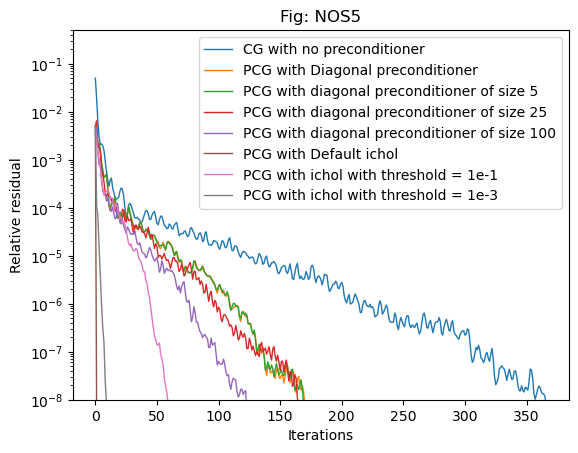

test 2 with the matrix NOS6: --------------------------------------------------
CG with no preconditioner: 
Time taken:  0.586181640625
Number of iterations:  200
---------------------------------------------------------
PCG with Diagonal preconditioner: 
Time taken:  0.25338196754455566
Number of iterations:  72
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 5: 
Time taken:  0.20804882049560547
Number of iterations:  55
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 25: 
Time taken:  0.19697809219360352
Number of iterations:  48
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 100: 
Time taken:  0.14846062660217285
Number of iterations:  31
---------------------------------------------------------
Incomplete Cholesky factorization: 
Time taken:  0.014553785324

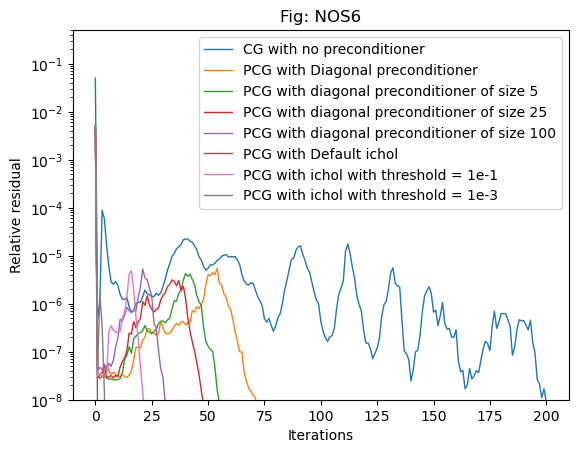

test 3 with the matrix s3rmt3m3: --------------------------------------------------
CG with no preconditioner: 
Time taken:  11.530978918075562
Number of iterations:  2000
---------------------------------------------------------
PCG with Diagonal preconditioner: 
Time taken:  16.58261799812317
Number of iterations:  2000
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 5: 
Time taken:  15.086786031723022
Number of iterations:  1422
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 25: 
Time taken:  15.712647438049316
Number of iterations:  805
---------------------------------------------------------
PCG with Block diagonal preconditioner with diagonal subblocks of 100: 
Time taken:  15.471123933792114
Number of iterations:  527
---------------------------------------------------------
Incomplete Cholesky factorization: 
PERFORMANCE WARNI

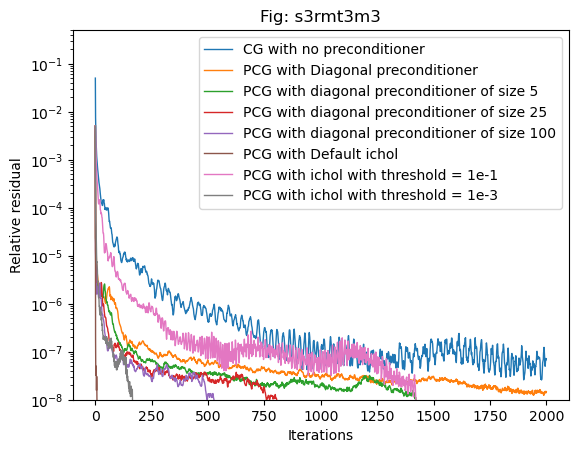

In [8]:
# TODO: Write your implementation here
tol = 1e-8
maxit = 2000

print("test 1 with the matrix NOS5: --------------------------------------------------")
A, rows = NOS5, NOS5.shape[0]
mainFunction(A, rows, tol, maxit, "NOS5")


print("test 2 with the matrix NOS6: --------------------------------------------------")
A, rows = NOS6, NOS6.shape[0]
mainFunction(A, rows, tol, maxit, "NOS6")


print("test 3 with the matrix s3rmt3m3: --------------------------------------------------")
A,rows = s3rmt3m3, s3rmt3m3.shape[0]
mainFunction(A, rows, tol, maxit, "s3rmt3m3")

# Report

| S3rmt3m3                                              | Number of Iterations|  Runtime(s) |
|----------                                         |:-------------:     |------:|
| CG with no pre-conditioner                        | 2000                |11.530978918075562|
| PCG with diagonal preconditioner                  | 2000                |16.58261799812317|
| PCG with block diagonal preconditioner of size 5  | 1422                |15.086786031723022|
| PCG with block diagonal preconditioner of size 25 | 805                |15.712647438049316|
| PCG with block diagonal preconditioner of size 100| 527                |15.471123933792114|
| PCG with Default ichol                            | 8                  |119.75136828422546|
| PCG with ichol with threshold = 1e-1              | 1422                 |52.838629722595215|
| PCG with ichol with threshold = 1e-3              | 165                  |389.1346015930176|

## Introduction
In this task I implemented cg and p_cg and made tests with different preconditioners and computed relative residuals over iterations with the 3 given test matrices.

In both functions, I converted all the inputs to sparse matrices sin order to
decrease the time of computation. I used the csr format because the "pymatting library" which I used accepts only this format as input. 
A create jacobi_block_diag() function t diagonalise the input matrix based on block size values {5, 25, 100} as requested.
I also create mainFunction() in order to avoid to repeat the entire test code 3 times.
I fixed tol = 1e-8 and maxit = 2000 for all tests. I chose those values after a lot of tests

## NOS5 test matrix
According the plots:
- For this test matrix, all the methods converge.
- The number of iterations and running time are decreasing when using pre-conditionning.
- The number of iterations is decreasing when using a bigger block size with block diagonal preconditioner, while the running time is slightly increasing.
- The number of iterations and running time are decreasing even more using use a smaller treshold with ichol.
- ichol without treshold is given the best results in term of number of iterations and running time.

You can observe those results in the table below:

| NOS5                                              | Number of Iterations|  Runtime(s) |
|----------                                         |:-------------:     |------:|
| CG with no pre-conditioner                        | 366                | 1.00154709815979  |
| PCG with diagonal preconditioner                  | 170                |0.5560517311096191|
| PCG with block diagonal preconditioner of size 5  | 169                |0.6011612415313721|
| PCG with block diagonal preconditioner of size 25 | 165                |0.7023670673370361|
| PCG with block diagonal preconditioner of size 100| 123                |0.7228906154632568|
| PCG with Default ichol                            | 1                  |0.037682294845581055|
| PCG with ichol with threshold = 1e-1              | 59                 |0.2633655071258545|
| PCG with ichol with threshold = 1e-3              | 9                  |0.15123748779296875|

## NOS6 test matrix
According the plots:
- For this test matrix, all the methods converge.
- The number of iterations and running time are decreasing when using pre-conditionning.
- The number of iterations and running time are decreasing when using a bigger block size with block diagonal preconditioner.
- The number of iterations and running time are decreasing even more when using a bigger treshold with ichol.
- With this test matrix,ichol with treshold=1e-1 is giving bad results compare to when using totreshold=1e-3. There no exact rules to follow when tunning the parameters of ichol.
- ichol without treshold is given the best results in term of number of iterations and running time.

You can observe those results in the table below:

| NOS6                                              | Number of Iterations|  Runtime(s) |
|----------                                         |:-------------:     |------:|
| CG with no pre-conditioner                        | 200                |0.586181640625|
| PCG with diagonal preconditioner                  | 72                |0.25338196754455566|
| PCG with block diagonal preconditioner of size 5  | 55                | 0.20804882049560547|
| PCG with block diagonal preconditioner of size 25 | 48                |0.19697809219360352|
| PCG with block diagonal preconditioner of size 100| 31                |0.14846062660217285|
| PCG with Default ichol                            | 1                  |0.01455378532409668|
| PCG with ichol with threshold = 1e-1              | 22                 |0.08759784698486328|
| PCG with ichol with threshold = 1e-3              | 5                  |0.027252197265625|

## S3rmt3m3 test matrix
According the plots:
- This matrix takes significantly more time to converge
- For this test matrix, CG with no pre-conditioner and PCG with diagonal preconditioner do not converge with only 2000 iterations. They require more than that due to the matrix size.
- The number of iterations and running time are decreasing when using a bigger block size with block diagonal preconditioner.
- With this particular matrix, p_cg is taking a huge amont of time to complete when using ichol with and without treshold.
- I am getting warnings when applying ichol to this matrix each time i changed the parameters. So, the problem is with the matrix format and not with tunning the parameters.
- The warning is "insufficient positive-definiteness of matrix A with the used parameters"
I found the following solutions online which apply only when using ichol from the library "pymatting":

       -Your sparse matrix is very large. You have these options:
       - To use a smaller matrix
       - To split up the matrix into (preferably overlapping) tiles, compute the alpha for          each tile and then merge the results.
       - Get a computer with a lot of memory and increase max_nnz, which controls how large  he Cholesky decomposition matrix is allowed to get. This matrix is necessary to compute the result in a reasonable amount of time. You can see an example usage of the ichol function which has the optional max_nnz parameter in the expert example.
       - Use the jacobi preconditioner instead of the ichol preconditioner in the expert example, i.e. M = jacobi(A) instead of M = ichol(A) and wait a long time.
You can observe those results in the table below:

## Conclusions
- In general, the number of iterations and running time decresed when using pre-conditionning.
- In general, the number of iterations and running time decresed when using a bigger block size with block diagonal preconditioner.
- In general, the number of iterations and running time decresed when finding the best tunning of ichol parameters.
- The matrix size and the matrix format(having too much O values) significantly the the behavior of p_cg especially when using ichol.